In [16]:
import math
import matplotlib.cm as cm

from math import exp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as c

# Read from file and extract X and y
df = pd.read_csv('data/p2.csv')

X_df = df[['x1', 'x2']]
y_df = df['y']

X = X_df.values
y = y_df.values

def kernel_distance(x_n, x, alpha): 
    W = np.array([[1,0],[0,1]])
    return math.exp(-1 * alpha * np.matmul(np.matmul(x_n - x, W), np.transpose(x_n - x)))
def predict_kernel(alpha=0.1):
    """Returns predictions using kernel-based predictor with the specified alpha."""
    num = 0 
    denom = 0
    y_preds = [] 
    for i in range(len(y)): 
        num = 0
        denom = 0
        for j in range(len(X)): 
            if i != j: 
                k_dist = kernel_distance(X[j], X[i], alpha)
                num += y_df[j] * k_dist
                denom += k_dist
        y_preds.append(num/denom)
    return y_preds
def add_to_nn(x_current, x_neighbor, y_val, nn, k): 
    for i in range(k): 
        dist = kernel_distance(x_neighbor, x_current, 1)
        if(nn[i].get('dist') == None or dist < nn[i].get('dist')): 
            nn[i]['dist'] = dist
            nn[i]['y_val'] = y_val
    
def predict_knn(k=1):
    """Returns predictions using KNN predictor with the specified k."""
    y_preds = []
    for i in range(len(y)): 
        neighbors = []
        pred = 0
        for j in range(len(X)): 
            if i != j: 
                neighbors.append({'dist': kernel_distance(X[j], X[i], 1), 'y_val': y[j]})
        neighbors.sort(key=lambda x: x.get('dist'), reverse=True)
        for n in range(min(k, len(X) - 1)):  
            pred += neighbors[n].get('y_val')
        y_preds.append(pred/(min(k, len(X) - 1)))
    return y_preds

def plot_kernel_preds(alpha):
    title = 'Kernel Predictions with alpha = ' + str(alpha)
    plt.figure()
    plt.title(title)
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.xlim((0, 2))
    plt.ylim((0, 2))

    plt.xticks(np.arange(0, 2, 0.1))
    plt.yticks(np.arange(0, 2, 0.1))
    y_pred = predict_kernel(alpha)
    #norm = c.Normalize(vmin=0.,vmax=1.)
    plt.scatter(df['x1'], df['x2'], c=y_pred, cmap='gray', vmin=0, vmax = 1, edgecolors='b')

    # Saving the image to a file, and showing it as well
    plt.savefig(title + '.png')
    plt.show()

def plot_knn_preds(k):
    title = 'KNN Predictions with k = ' + str(k)
    plt.figure()
    plt.title(title)
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.xlim((0, 2))
    plt.ylim((0, 2))
    plt.xticks(np.arange(0, 2, 0.1))
    plt.yticks(np.arange(0, 2, 0.1))
    y_pred = predict_knn(k)
    norm = c.Normalize(vmin=0.,vmax=1.)
    plt.scatter(df['x1'], df['x2'], c=y_pred, cmap='gray', vmin=0, vmax = 1, edgecolors='b')

    # Saving the image to a file, and showing it as well
    plt.savefig(title + '.png')
    plt.show()
def compute_loss(preds): 
    return sum([(pred - actual)**2 for pred, actual in zip(preds, y)])

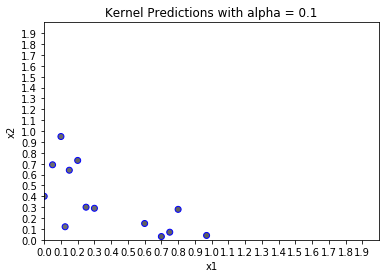

1.8399712540879825


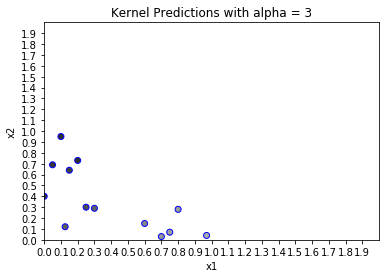

0.6200161545448002


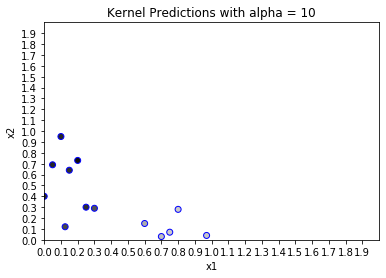

0.3900129358555043


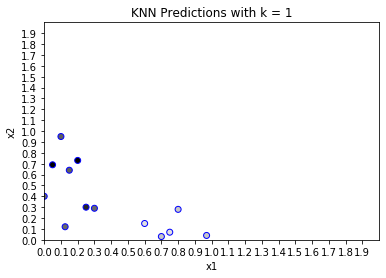

0.8383999999999999


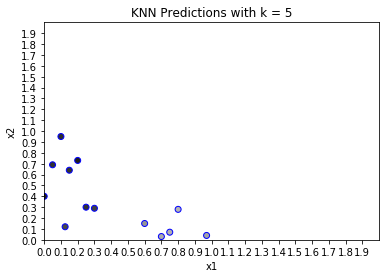

0.46929999999999994


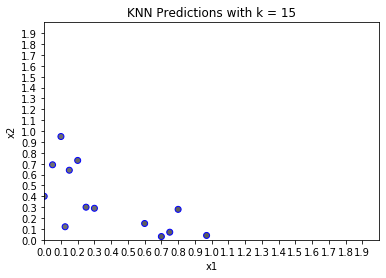

1.922573611111111


In [17]:
for alpha in (0.1, 3, 10):
    # TODO: Print the loss for each chart.
    plot_kernel_preds(alpha)
    print(compute_loss(predict_kernel(alpha)))

for k in (1, 5, 15):
    # TODO: Print the loss for each chart.
    plot_knn_preds(k)
    print(compute_loss(predict_knn(k)))